## Understanding divergences between minibatches of samples

The purpose of this notebook is to investigate what happens when calculating divergences (KL or JS) between i.i.d. sequences of variables, rather than between variables themselves. Here I use univariate Bernoulli variables parametrised by a single probability value $p$ and $q$. This notebook complements [this blog post](http://www.inference.vc/understanding-minibatch-discrimination-in-gans/)

### KL divergence 
The KL divergence between N minibatches of i.i.d. samples from $Q$ and $P$ should be $N$ times the KL divergence between $Q$ and $P$. Below, I numerically verify that this is indeed the case.

### JS divergence
The JS divergence between N minibatches of i.i.d. samples from $Q$ and $P$ should be *upper bounded by* $N$ times the JS divergence between $Q$ and $P$. The graphs below show the shape of the resulting divergences for increasing minibatch sizes. The $JS$ divergence is also upper bounded by $1$, and in the limit of increasing minibatch sizes, the divergence converges to this limit everywhere except $P=Q$.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns

In [2]:
def kldiv(P,Q):
    """KL divergence between two sets of discrete distributions P and Q
    
    Parameters
    ----------
    Q, P : numpy.array with ndims=2
        These arrays encode the distributions or arrays of to be compared.
        Q and P should have the same second dimension, which is the number
        of discrete values the random variable can take. The first dimension
        is either 1 for P or Q, or has to be the same for P and Q.
        
    Returns
    -------
    numpy.array with ndims=2
        array of KL divergence values between the corresponding P and Q
        distributions.
    """
    return (P*(np.log2(P) - np.log2(Q))).sum(axis=1)

def jsdiv(P, Q):
    mixture = (P+Q)/2
    return (kldiv(P, mixture) + kldiv(Q, mixture))/2

In [3]:
#initialise P
P = np.array([[0.2,0.8]])

#different Q distributions with a range of parameter values:
Q = np.linspace(0,1,1000)[1:-1]
Q = np.array([Q,1-Q]).T

In [4]:
klpq = kldiv(P,Q)
klqp = kldiv(Q,P)
jspq = jsdiv(P,Q)

In [5]:
sns.set_context('poster')

plt.figure(figsize=(8,6))
plt.plot(h,klpq);
plt.plot(h,klqp);
plt.plot(h,jspq*4.2);

plt.plot([hstar,hstar],[0,1],':k')
plt.xlabel('$H[q]$')
plt.ylabel('divergence')
plt.legend(['$KL[p\|q]$', '$KL[q\|p]$', '$JS[p\|q]$'],loc=2)

plt.ylim([0,1]);

NameError: name 'h' is not defined

In [6]:
def iid2(P):
    """Takes a(n array of) discrete distribution P and returns the discrete
    joint distribution of 2 independent and identically distributed samples
    from P
    
    Parameters
    ----------
    P : numpy.array with ndims=2
        This array encodes discrete probability distributions. The second
        dimension indexes the different values the random variable can take
        
    Returns
    -------
    numpy.array with ndims=2
        array representing the join distributions of two i.i.d. samples drawn
        from the corresponding distribution in P
    """
    n,d = P.shape
    return (P.reshape((n,d,1)) * P.reshape((n,1,d))).reshape(n,d**2)

In [7]:
#checking that the math works: the KL divergence between the joint distribution
#of two i.i.d. samples should be exactly twice the KL divergence between single
#samples.

klpq = kldiv(P,Q)
klpq2 = kldiv(iid2(P),iid2(Q))/2
assert np.allclose(klpq,klpq2)

In [8]:
#looking at 'minibatch' JS divergence for increasing minibatch sizes:
jspq = jsdiv(P,Q)
jsp2q2 = jsdiv(iid2(P),iid2(Q))
jsp4q4 = jsdiv(iid2(iid2(P)),iid2(iid2(Q)))
jsp8q8 = jsdiv(iid2(iid2(iid2(P))),iid2(iid2(iid2(Q))))

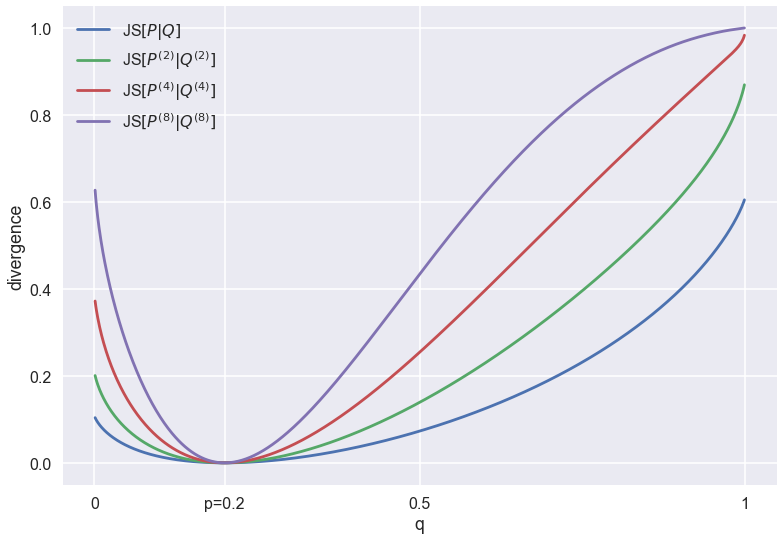

In [9]:
sns.set_context('poster')
plt.plot(Q[:,0],jspq)
plt.plot(Q[:,0],jsp2q2)
plt.plot(Q[:,0],jsp4q4)
plt.plot(Q[:,0],jsp8q8)
plt.xlabel('q')
plt.ylabel('divergence')
plt.legend(['JS$[P\|Q]$', 
            'JS$[P^{(2)}\|Q^{(2)}]$',
            'JS$[P^{(4)}\|Q^{(4)}]$',
            'JS$[P^{(8)}\|Q^{(8)}]$'],loc=2);
plt.xticks([0,0.2,0.5,1], ['0','p=0.2','0.5','1']);

NameError: name 'jsp16q16' is not defined

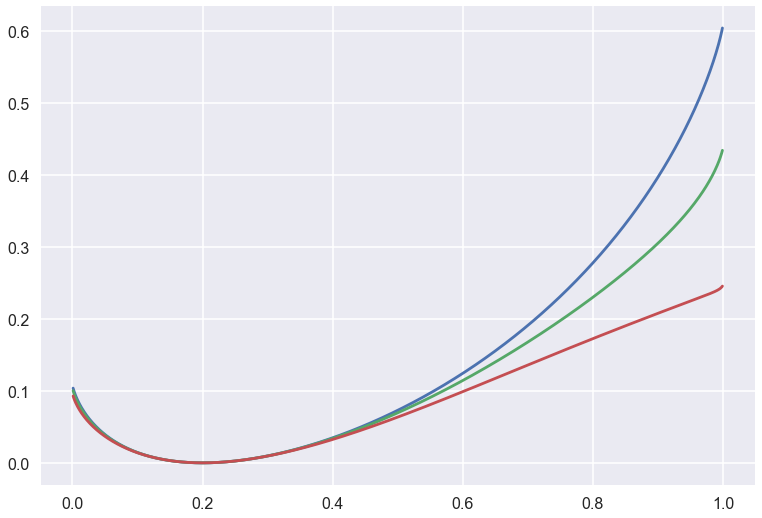

In [10]:
sns.set_context('poster')
plt.plot(Q[:,0],jspq)
plt.plot(Q[:,0],jsp2q2/2)
plt.plot(Q[:,0],jsp4q4/4)
plt.plot(Q[:,0],jsp16q16/8)
plt.xlabel('q')
plt.ylabel('divergence')
plt.legend(['$JS[P\|Q]$', 
            '$JS[P^{(2)}\|Q^{(2)}]/2$',
            '$JS[P^{(4)}\|Q^{(4)}]/4$',
            '$JS[P^{(8)}\|Q^{(8)}]/8$'],loc=2);
plt.ylim([0,0.2]);
plt.xticks([0,0.2,0.5,1], ['0','p=0.2','0.5','1']);